In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# import data set
data = pd.read_csv('housing 2.csv')

In [3]:
# print first 5 rows using head()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# get the shape of the data
data.shape

(20640, 10)

In [5]:
# get info about the data
data.info()
# we can see missing values already

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# statistical summary of data
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# checking for missing values
data.isnull().sum()
# from this we can see 207 missing values from total_bedrooms attribute

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# filling missing values with mean value
data['total_bedrooms'].fillna(value=data['total_bedrooms'].mean(), inplace=True)

In [9]:
# checking to see if missing values have been replaced with mean value
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

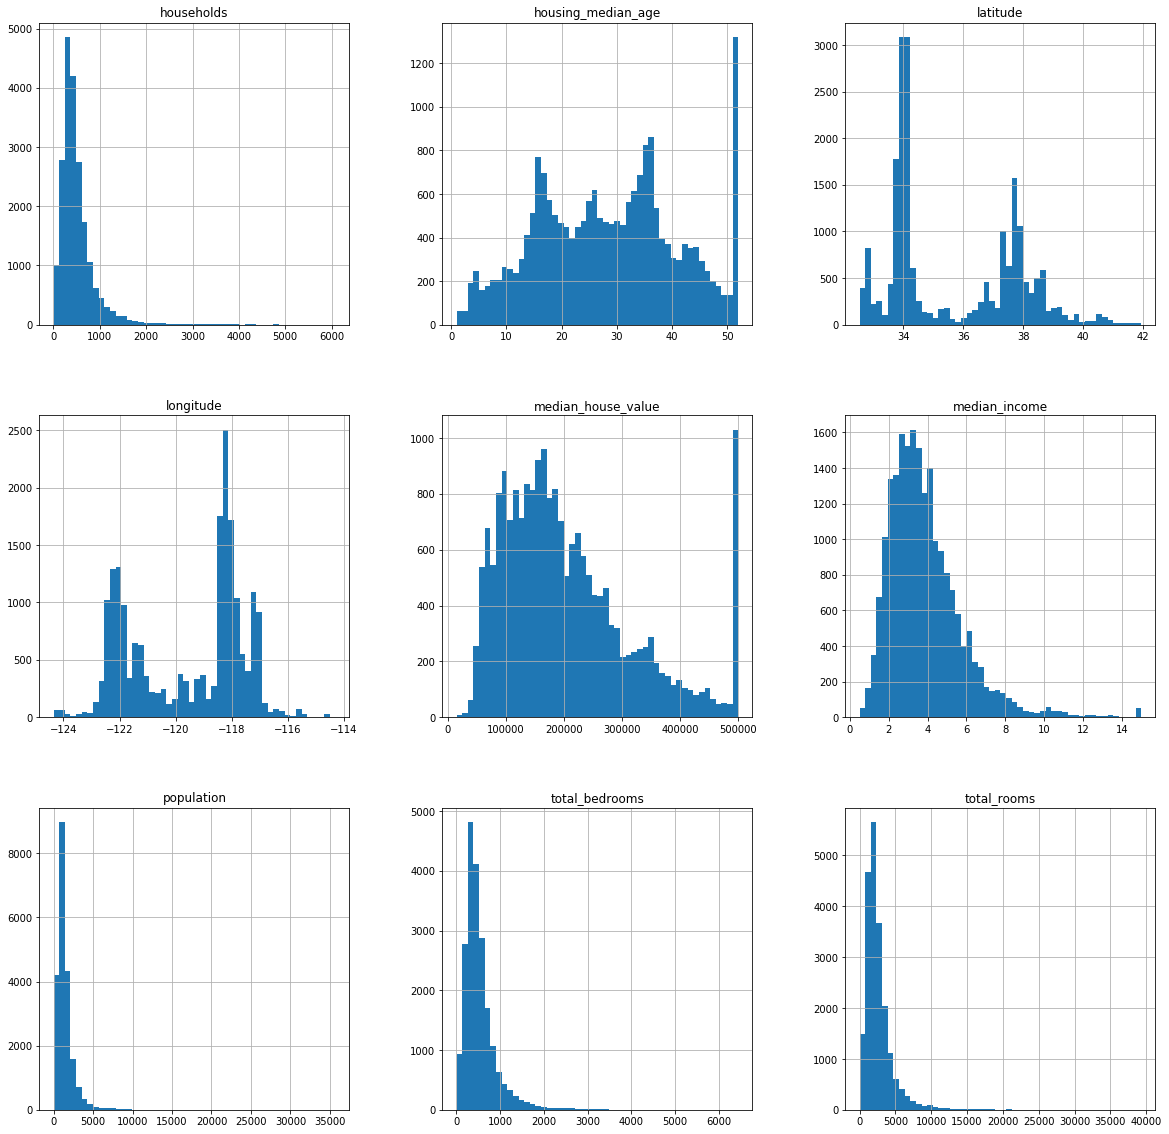

In [10]:
# histograms of all attributes
data.hist(bins=50, figsize=(20,20))
plt.show()
# some variables are tail heavy and extend further to the right of the median that to the left
# our model will less likely be able to determine patterns from these

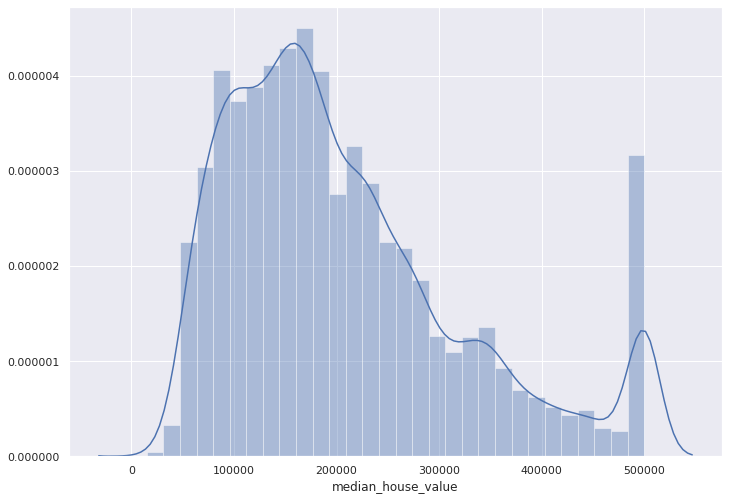

In [11]:
# more in depth look at target value
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['median_house_value'], bins=30)
plt.show()
# median house value is capped at $500,000

In [12]:
# get shape of noisy data
data[data['median_house_value'] >= 500000 ].shape

(992, 10)

In [13]:
# remove noisy data from data set
data = data[data['median_house_value'] <= 500000]
data.shape
# rows went from 20,640 to 19,675

(19675, 10)

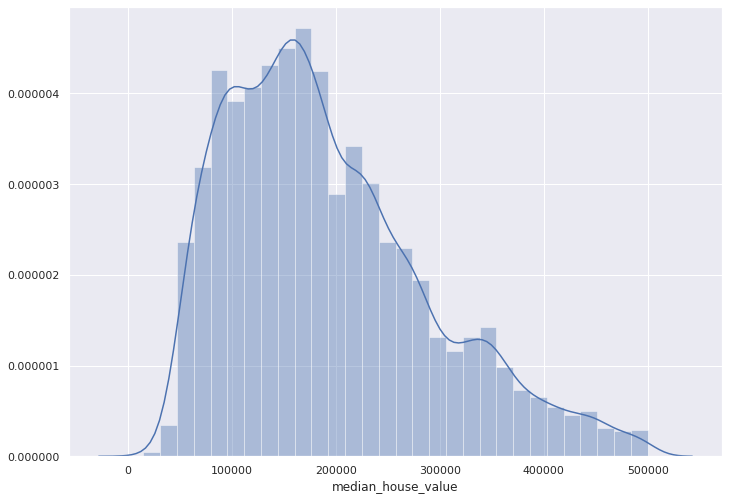

In [14]:
# check new histogram of target value 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['median_house_value'], bins=30)
plt.show()
# we can see that median house value has been cleaned

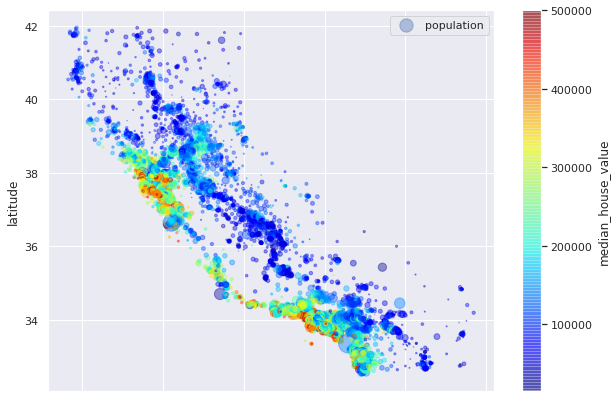

In [15]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
# color represents price of house
# radius of circle represents population size

In [16]:
# calculating avg rooms, bedrooms, and population per household
data['avg_rooms'] = data['total_rooms']/data['households']
data['avg_bedrooms'] = data['total_bedrooms']/data['households']
data['avg_pop'] = data['population'] / data['households']

data.head()
# avg_room ,avg_bedrooms, avg_pop have been added to end of dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,avg_pop
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


In [17]:
# corr matrix to find correlation between predictors

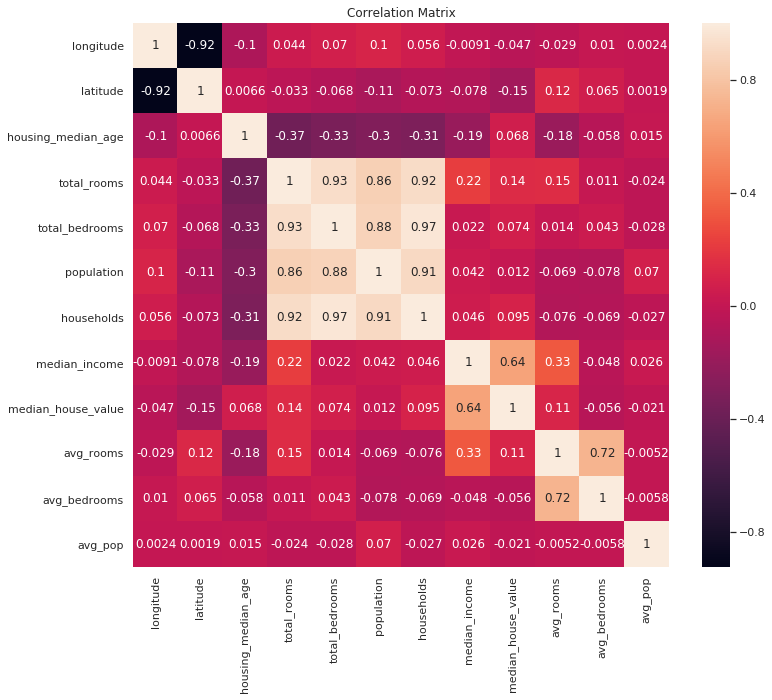

In [18]:
plt.figure(figsize=(12,10))
corr_matrix = data.corr()
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show()

In [19]:
# the correlation between target and other variables
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.642611
total_rooms           0.143139
avg_rooms             0.109673
households            0.094894
total_bedrooms        0.074283
housing_median_age    0.067948
population            0.011964
avg_pop              -0.021465
longitude            -0.046658
avg_bedrooms         -0.055615
latitude             -0.148289
Name: median_house_value, dtype: float64

In [20]:
# we can see that median income has a high positive correlation to our target variable
# total rooms and avg rooms have low positive correlations to our target variable
# households, total bedrooms, housing median age, and population have very low positive correlations
# avg pop, longitude, avg bedrooms, and latitude have negative correlations 

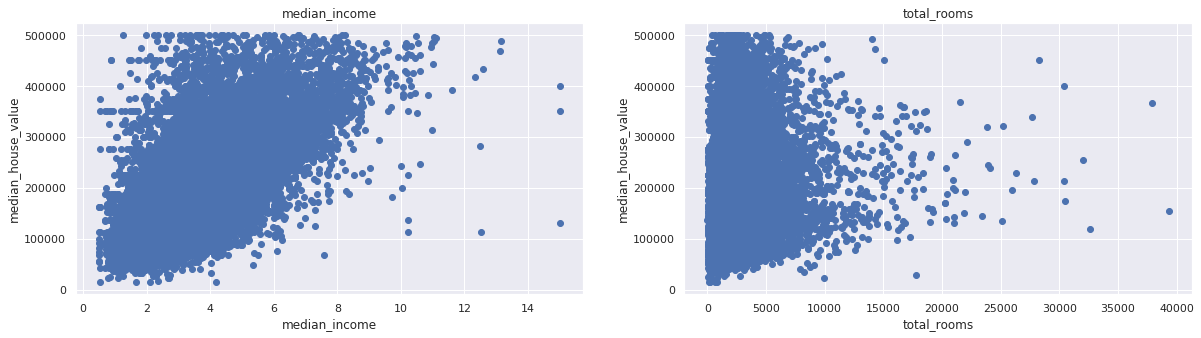

In [21]:
plt.figure(figsize=(20, 5))

features = ['median_income', 'total_rooms']
target = data['median_house_value']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('median_house_value')

In [22]:
'''
The above visualizations can confirm that median_income does have a positive correlation with our target value.
Total_rooms does have a positive correlation with our target value but this correlation is very minimal.
'''

'\nThe above visualizations can confirm that median_income does have a positive correlation with our target value.\nTotal_rooms does have a positive correlation with our target value but this correlation is very minimal.\n'

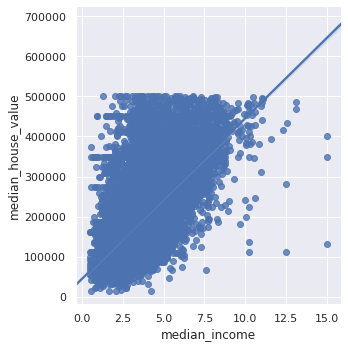

In [23]:
# more in depth look at scatter plot with best fit line
sns.lmplot(x='median_income',y='median_house_value',data=data,fit_reg=True) 


In [24]:
# one hot encode our categorical variable ocean proximity
from sklearn.preprocessing import OneHotEncoder

housing_cat = data[['ocean_proximity']]

transformer = OneHotEncoder(sparse=False)
housing_ohe = transformer.fit_transform(housing_cat)
housing_ohe

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [25]:
OneHotEncoder = pd.DataFrame(data = housing_ohe, columns=['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'])

OneHotEncoder

,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
19670,0.0,1.0,0.0,0.0,0.0
19671,0.0,1.0,0.0,0.0,0.0
19672,0.0,1.0,0.0,0.0,0.0
19673,0.0,1.0,0.0,0.0,0.0


In [26]:
# reset index
housing = data.set_index(np.arange(0,19675))
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms,avg_bedrooms,avg_pop
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333,2.560606
19671,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789,3.122807
19672,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092,2.325635
19673,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920,2.123209


In [27]:
# delete ocean proximity variable
housing.drop(columns=['ocean_proximity', 'total_rooms', 'total_bedrooms', 'population'], axis=1, inplace=True)
housing

,longitude,latitude,housing_median_age,households,median_income,median_house_value,avg_rooms,avg_bedrooms,avg_pop
0,-122.23,37.88,41.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467
...,...,...,...,...,...,...,...,...,...
19670,-121.09,39.48,25.0,330.0,1.5603,78100.0,5.045455,1.133333,2.560606
19671,-121.21,39.49,18.0,114.0,2.5568,77100.0,6.114035,1.315789,3.122807
19672,-121.22,39.43,17.0,433.0,1.7000,92300.0,5.205543,1.120092,2.325635
19673,-121.32,39.43,18.0,349.0,1.8672,84700.0,5.329513,1.171920,2.123209


In [28]:
# concatenate housing and OneHotEncoder
housing_prep = pd.concat([housing, OneHotEncoder], axis=1)
housing_prep

,longitude,latitude,housing_median_age,households,median_income,median_house_value,avg_rooms,avg_bedrooms,avg_pop,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND
0,-122.23,37.88,41.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19670,-121.09,39.48,25.0,330.0,1.5603,78100.0,5.045455,1.133333,2.560606,0.0,1.0,0.0,0.0,0.0
19671,-121.21,39.49,18.0,114.0,2.5568,77100.0,6.114035,1.315789,3.122807,0.0,1.0,0.0,0.0,0.0
19672,-121.22,39.43,17.0,433.0,1.7000,92300.0,5.205543,1.120092,2.325635,0.0,1.0,0.0,0.0,0.0
19673,-121.32,39.43,18.0,349.0,1.8672,84700.0,5.329513,1.171920,2.123209,0.0,1.0,0.0,0.0,0.0


In [29]:
# split our data set into test and train sets for simple linear regression model
X = pd.DataFrame(np.c_[data['median_income']], columns = ['median_income'])
Y = data['median_house_value']

In [30]:
# prepare our samples for training and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15740, 1)
(3935, 1)
(15740,)
(3935,)


In [31]:
# prepare our model for training
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
# model evaluation for training set
y_train_predict = linear_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set:")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set:
--------------------------------------
RMSE is 74512.7029724869
R2 score is 0.41766647477895436


In [33]:
# model evaluation for testing set
y_test_predict = linear_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set:")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set:
--------------------------------------
RMSE is 76259.44461090112
R2 score is 0.3940848054181735


In [34]:
#Nonlinear regression using NumPy

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [35]:
'''
Nonlinear regression using Scikit-Learn
Creating training and testing set
'''
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [36]:
train_x = np.asanyarray(train[["median_income"]])
train_y = np.asanyarray(train[["median_house_value"]])

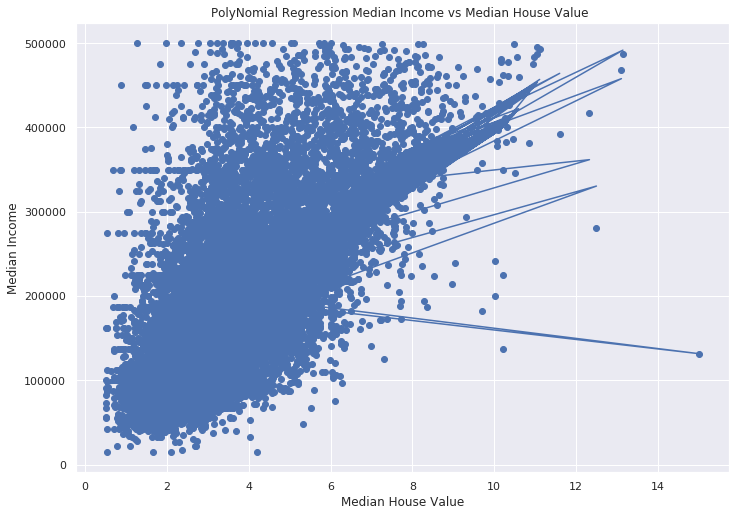

In [37]:
"""
Nonlinear regression using Polynomial regression from Scikit learn 

Changing degree to 15 allowed for the highest r2 value
"""
poly = PolynomialFeatures(degree= 15
                          )
poly_features = poly.fit_transform(train_x)
poly.fit(train_x,train_y)
poly_regression = LinearRegression()
poly_regression.fit(poly_features,train_y)

#ploting the data  
plt.scatter(train_x,train_y)
plt.plot(train_x,poly_regression.predict(poly_features))
plt.title("PolyNomial Regression Median Income vs Median House Value ")
plt.xlabel("Median House Value")
plt.ylabel("Median Income")
plt.show()

In [38]:
"""
Polynomial model evaluation
"""
from sklearn.metrics import r2_score
y_train_predict = poly_regression.predict(poly_features)
rmse = (np.sqrt(mean_squared_error(train_y, y_train_predict)))
r2 = r2_score(train_y, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")
print("The Root Mean Squared Error")
print("--------------------------------------")
print(rmse)

The model performance for training set
--------------------------------------
R2 score is 0.4234630262940384


The Root Mean Squared Error
--------------------------------------
74048.90719006656
